In [2]:
!pip install PySastrawi

In [1]:
#import libraries
import pandas as pd
import numpy as np

In [2]:
#Load the datasets
data = pd.read_csv('D:/DS Comp Prep/Twitter hate speech/data.csv' , encoding='latin-1')
abusive = pd.read_csv('D:/DS Comp Prep/Twitter hate speech/abusive.csv' , encoding='latin-1' )
kamusalay = pd.read_csv('D:/DS Comp Prep/Twitter hate speech/new_kamusalay.csv' , encoding='latin-1',header=None)
kamusalay = kamusalay.rename(columns={0:'original' , 1:'replacement'})
stopword = pd.read_csv('D:/DS Comp Prep/Twitter hate speech/stopword.csv' , header =None , encoding='latin-1' )
print('ukuran data : ', data.shape)
print('ukuran abusive: ', abusive.shape)
print( 'ukuran :', kamusalay.shape)

ukuran data :  (13169, 13)
ukuran abusive:  (125, 1)
ukuran : (15167, 2)


In [3]:
data.head(15)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,1,1,0,1,0,0,0,0,1,0,1,0
6,deklarasi pilkada 2018 aman dan anti hoax warg...,0,0,0,0,0,0,0,0,0,0,0,0
7,Gue baru aja kelar re-watch Aldnoah Zero!!! pa...,0,1,0,0,0,0,0,0,0,0,0,0
8,Nah admin belanja satu lagi port terbaik nak m...,0,0,0,0,0,0,0,0,0,0,0,0
9,USER Enak lg klo smbil ngewe',0,1,0,0,0,0,0,0,0,0,0,0


In [4]:
non_toxic = data[(data['HS']==0) & (data['Abusive']==0)].shape
toxic = data[(data['HS']==1) | (data['Abusive']==1)].shape
print(non_toxic)
print(toxic)

(5860, 13)
(7309, 13)


In [5]:
abusive.head(125)

,ABUSIVE
0,alay
1,ampas
2,buta
3,keparat
4,anjing
...,...
120,rezim
121,sange
122,serbet
123,sipit


In [6]:
kamusalay.head(15)

,original,replacement
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali
5,aamiin,amin
6,aamiinn,amin
7,aamin,amin
8,aammiin,amin
9,abis,habis


In [7]:
stopword.head()

,0
0,ada
1,adalah
2,adanya
3,adapun
4,agak


In [8]:
#preprocess
import re
def lowercase(text):
    return text.lower()

def remove_unnecessary_char(text):
    text = re.sub('\n',' ',text)
    text = re.sub('rt',' ',text)
    text = re.sub('use',' ',text)
    return text

def remove_nonalphanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+',' ',text)
    return text

In [32]:
#kotretan
a = zip(kamusalay['original'] , kamusalay['replacement'])
#print(tuple(a))
b = dict(a)
#print(b)


5561
7608


5561
5043


<BarContainer object of 2 artists>

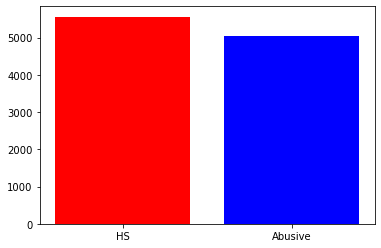

In [51]:
#comparing HS and Abusive
import matplotlib.pyplot as plt

count_HS = []
for m in range(len(data['HS'])):
    if (data['HS'][m] == 1):
        count_HS.append(' ')
print(len(count_HS))

count_Abusive = [] 
for m in range(len(data['Abusive'])):  
    if (data['Abusive'][m] == 1):
        count_Abusive.append(' ')
print(len(count_Abusive))

x = ['HS' , 'Abusive']
y = [len(count_HS) , len(count_Abusive)]
plt.bar(x,y,color=('red','blue'))

In [58]:
#comparing some HS's type        
def count(hs_type):
    count = []
    for m in range(len(data[hs_type])):
        if(data[hs_type][m]==1):
            count.append(' ')
    return len(count)

Text(0.5, 1.0, 'HS Types Comparison')

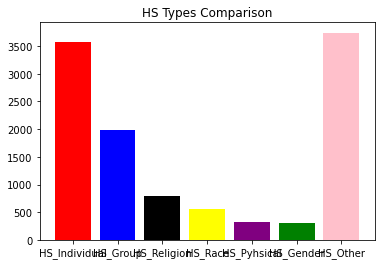

In [61]:
x = ['HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Pyhsical','HS_Gender','HS_Other']
y = [count('HS_Individual'),count('HS_Group'),count('HS_Religion'),count('HS_Race'),count('HS_Physical'),count('HS_Gender'),count('HS_Other')]
plt.bar(x,y,color=('red','blue','black','yellow','purple','green','pink'))
plt.title('Hate Speech Types Comparison')

Text(0.5, 1.0, 'HS Types Comparison')

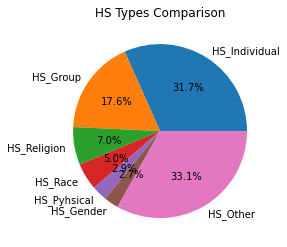

In [62]:
plt.pie(y , labels=x , autopct='%1.1f%%')
plt.title('Hate Speech Types Comparison')

In [63]:
#comparing some HS's strength        
def count(strength):
    count = []
    for m in range(len(data[strength])):
        if(data[strength][m]==1):
            count.append(' ')
    return len(count)

Text(0.5, 1.0, 'Hate Speech Strength Comparison')

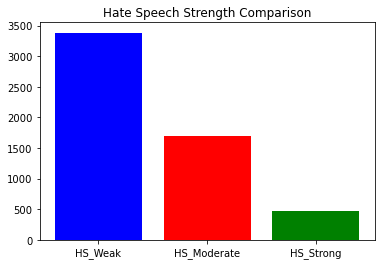

In [64]:
x = ['HS_Weak','HS_Moderate','HS_Strong']
y = [count('HS_Weak'),count('HS_Moderate'),count('HS_Strong')]
plt.bar(x,y,color=('blue','red','green'))
plt.title('Hate Speech Strength Comparison')

Text(0.5, 1.0, 'Hate Speech Strength Comparison')

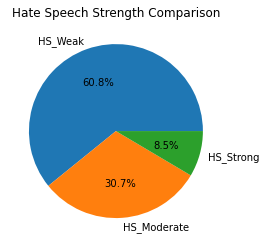

In [66]:
plt.pie(y , labels=x,autopct='%1.1f%%')
plt.title('Hate Speech Strength Comparison')